In [1]:
# import libraries
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score



import data

In [2]:
store_sales = pd.read_csv('data_sales demand forecasting.csv')
store_sales.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [3]:
store_sales.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [4]:
#check num of rows and columns
store_sales.shape

(913000, 4)

In [5]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [6]:
store_sales.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [37]:
# X = store_sales.iloc[:,:-1].values
# X[:, :]
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imputer.fit(X[:, :])
# X[:, :] = imputer.transform(X[:, :])
# print(X[:, :])
# store_sales.iloc[:, :-1] = X[:, :]

[[Period('2013-01', 'M')]
 [Period('2013-01', 'M')]
 [Period('2013-01', 'M')]
 ...
 [Period('2017-12', 'M')]
 [Period('2017-12', 'M')]
 [Period('2017-12', 'M')]]


C:\Users\user\AppData\Local\Temp\ipykernel_14276\2459702771.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  store_sales.iloc[:, :-1] = X[:, :]


In [8]:
print(store_sales['sales'].min())
print(store_sales['sales'].max())

0
231


Dropping store and item columns

In [9]:
store_sales = store_sales.drop(['store' , 'item'] , axis=1)
store_sales.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


Time series analysis to identify patterns or trends in the data.

converting date from object data type to dateTime datatype

In [10]:
store_sales['date'] = pd.to_datetime(store_sales['date'])
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


predicting the sales acrodding a period of a month 

In [11]:
store_sales['date'] = store_sales['date'].dt.to_period('M')
monthly_sales = store_sales.groupby('date').sum().reset_index()

In [12]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()
monthly_sales.head()

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242


Visualization

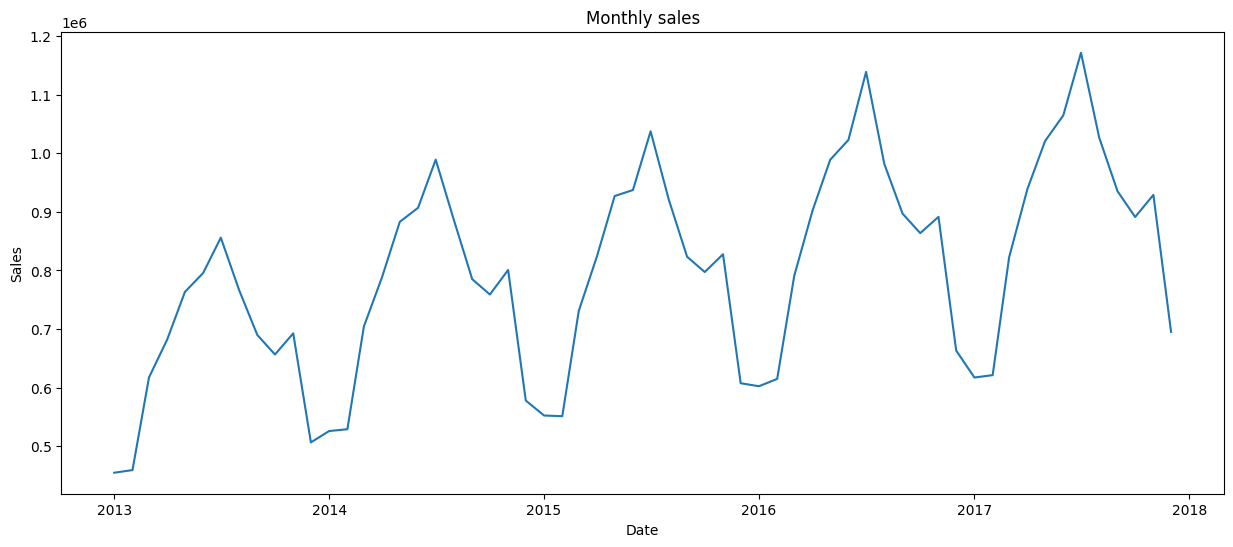

In [13]:
plt.figure(figsize=(15,6))
plt.plot(monthly_sales['date'],monthly_sales['sales'] )
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly sales')
plt.show()

Call the diffrence on the sales columns to make the sales data stationary

In [14]:
monthly_sales['sales_diffrence'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head()

,date,sales,sales_diffrence
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0


Visualization

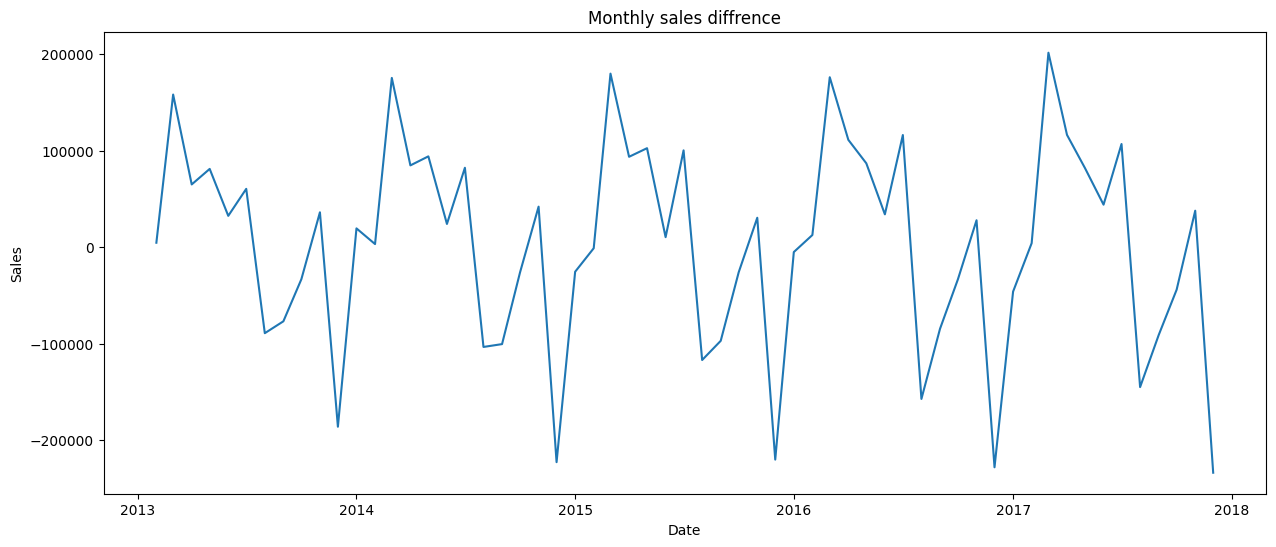

In [15]:
plt.figure(figsize=(15,6))
plt.plot(monthly_sales['date'],monthly_sales['sales_diffrence'] )
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly sales diffrence')
plt.show()

Dropping of sales and date

In [16]:
supervised_data = monthly_sales.drop(['date' ,'sales'] , axis=1)
supervised_data.head()

,sales_diffrence
1,4513.0
2,157965.0
3,64892.0
4,80968.0
5,32355.0


Preparing the supervised data

In [17]:
for i in range(1,13):
    col_name = 'month ' + str(i)
    supervised_data[col_name] = supervised_data['sales_diffrence'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)    
supervised_data.head()

,sales_diffrence,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0


In [18]:
supervised_data.shape

(47, 13)

Split the data into train and test

In [19]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print('Train data shape: ',train_data.shape)
print('Test data shape: ',test_data.shape)


Train data shape:  (35, 13)
Test data shape:  (12, 13)


scaling the data

In [20]:
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [21]:
x_train , y_train = train_data[:,1:] , train_data[:,0:1]
x_test , y_test = test_data[:,1:] , test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print('X_train Shape : ',x_train.shape)
print('Y_train Shape : ',y_train.shape)
print('X_test Shape : ',x_test.shape)
print('Y_test Shape : ',y_test.shape)

X_train Shape :  (35, 12)
Y_train Shape :  (35,)
X_test Shape :  (12, 12)
Y_test Shape :  (12,)


Make Prediction frame to merge predicted sales prices of all trained algorithms

In [22]:
sales_dates = monthly_sales['date'].iloc[-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)
predict_df

,date
0,2017-01-01
1,2017-02-01
2,2017-03-01
3,2017-04-01
4,2017-05-01
5,2017-06-01
6,2017-07-01
7,2017-08-01
8,2017-09-01
9,2017-10-01


In [23]:
act_sales = monthly_sales['sales'].iloc[-13:].to_list()
act_sales

[663411,
 617306,
 621369,
 822667,
 938862,
 1020686,
 1064624,
 1171393,
 1026403,
 935263,
 891160,
 928837,
 695170]

Create the linear regression model

In [24]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
lr_pre = lr_model.predict(x_test)
lr_pre

array([-0.17877039,  0.06539592,  1.78768044,  1.07731681,  0.83633908,
        0.37437187,  1.22426316, -1.59413648, -0.81747609, -0.28647966,
        0.1993606 , -2.19029223])

In [25]:
lr_pre = lr_pre.reshape(-1,1)
lr_pre_test_set = np.concatenate([lr_pre,x_test],axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)
# lr_pre_test_set

In [26]:
result_list = []
for index in range(0,len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[index][0] + act_sales[index])

lr_pre_series = pd.Series(result_list , name= 'Linear Prediction')
predict_df = predict_df.merge(lr_pre_series , left_index= True , right_index=True)
predict_df

,date,Linear Prediction
0,2017-01-01,6.479148e+05
1,2017-02-01,6.283374e+05
2,2017-03-01,8.195190e+05
3,2017-04-01,9.436391e+05
4,2017-05-01,1.033653e+06
5,2017-06-01,1.065286e+06
6,2017-07-01,1.201561e+06
7,2017-08-01,1.002123e+06
8,2017-09-01,9.415142e+05
9,2017-10-01,9.080646e+05


Evaluation

In [27]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'],monthly_sales['sales'].iloc[-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'],monthly_sales['sales'].iloc[-12:])
lr_r2 = r2_score(predict_df['Linear Prediction'],monthly_sales['sales'].iloc[-12:])

print('Linear Regression MSE',lr_mse)
print('Linear Regression MAE',lr_mae)
print('Linear Regression R2',lr_r2)


Linear Regression MSE 16221.272385416869
Linear Regression MAE 12433.184266490754
Linear Regression R2 0.9906152516380969


Visualization of prediction against actual sales using linear Regression

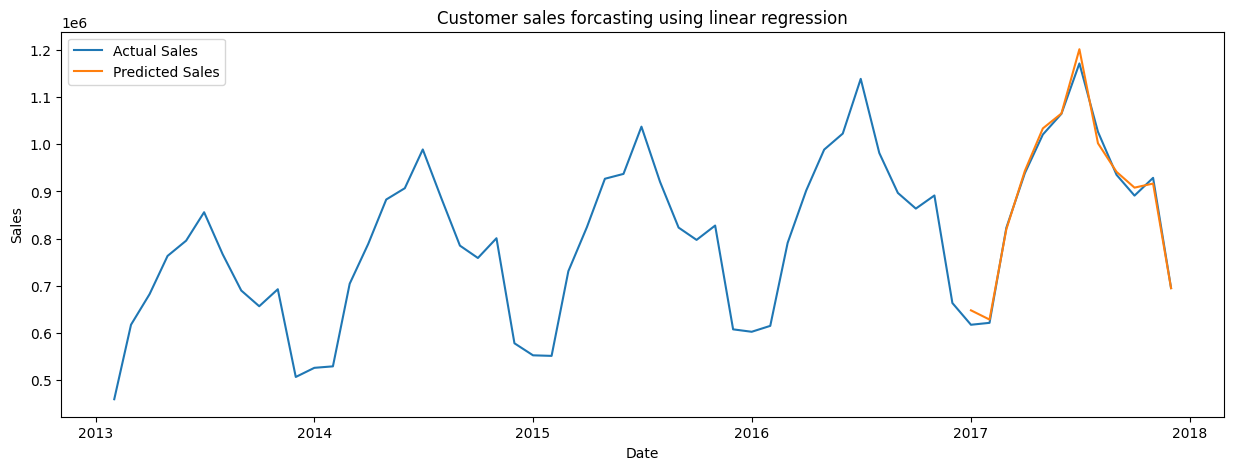

In [28]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])

plt.plot(predict_df['date'],predict_df['Linear Prediction'])
plt.title('Customer sales forcasting using linear regression')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(['Actual Sales','Predicted Sales'])

In [29]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions on the test set
rf_pre = rf_model.predict(x_test)
rf_pre = rf_pre.reshape(-1, 1)
rf_pre_test_set = np.concatenate([rf_pre, x_test], axis=1)
rf_pre_test_set = scaler.inverse_transform(rf_pre_test_set)

# Calculate the actual sales for comparison
result_list_rf = [rf_pre_test_set[index][0] + act_sales[index] for index in range(len(rf_pre_test_set))]

# Convert the result list into a pandas Series
rf_pre_series = pd.Series(result_list_rf, name='Random Forest Prediction')

# Merge the predictions with the original DataFrame
predict_df = predict_df.merge(rf_pre_series, left_index=True, right_index=True)

# Calculate evaluation metrics
rf_mse = np.sqrt(mean_squared_error(predict_df['Random Forest Prediction'], monthly_sales['sales'].iloc[-12:]))
rf_mae = mean_absolute_error(predict_df['Random Forest Prediction'], monthly_sales['sales'].iloc[-12:])
rf_r2 = r2_score(predict_df['Random Forest Prediction'], monthly_sales['sales'].iloc[-12:])

# Print the results
print('Random Forest Regression MSE:', rf_mse)
print('Random Forest Regression MAE:', rf_mae)
print('Random Forest Regression R2:', rf_r2)

Random Forest Regression MSE: 18271.929294644386
Random Forest Regression MAE: 15419.635
Random Forest Regression R2: 0.9872327690778031


Visualization of prediction against actual sales using Random Forest

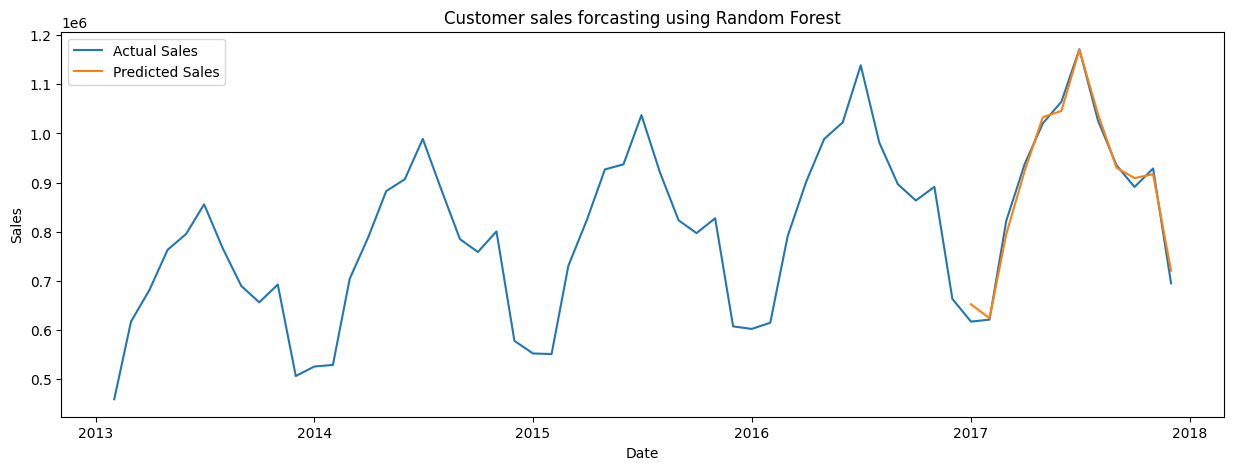

In [30]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])

plt.plot(predict_df['date'],predict_df['Random Forest Prediction'])
plt.title('Customer sales forcasting using Random Forest')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(['Actual Sales','Predicted Sales'])

In [31]:
# from sklearn.ensemble import VotingRegressor
# # Create a VotingRegressor
# voting_model = VotingRegressor([('linear', lr_model), ('rf', rf_model)])

# # Train the VotingRegressor
# voting_model.fit(x_train, y_train)

# # Make predictions on the test set
# voting_pre = voting_model.predict(x_test)
# voting_pre = voting_pre.reshape(-1, 1)
# voting_pre_test_set = np.concatenate([voting_pre, x_test], axis=1)
# voting_pre_test_set = scaler.inverse_transform(voting_pre_test_set)

# # Calculate the actual sales for comparison
# result_list_voting = [voting_pre_test_set[index][0] + act_sales[index] for index in range(len(voting_pre_test_set))]

# # Convert the result list into a pandas Series
# voting_pre_series = pd.Series(result_list_voting, name='Voting Prediction')

# # Merge the predictions with the original DataFrame
# predict_df = predict_df.merge(voting_pre_series, left_index=True, right_index=True)

# # Calculate evaluation metrics
# voting_mse = np.sqrt(mean_squared_error(predict_df['Voting Prediction'], monthly_sales['sales'].iloc[-12:]))
# voting_mae = mean_absolute_error(predict_df['Voting Prediction'], monthly_sales['sales'].iloc[-12:])
# voting_r2 = r2_score(predict_df['Voting Prediction'], monthly_sales['sales'].iloc[-12:])

# # Print the results
# print('Voting Model MSE:', voting_mse)
# print('Voting Model MAE:', voting_mae)
# print('Voting Model R2:', voting_r2)